In [ ]:
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten,GlobalAveragePooling2D,BatchNormalization,Dropout,Activation
from keras.models import Model
# from keras.applications.densenet201 import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
# from keras.applications.densenet201 import DenseNet201
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
# Download kaggle.json terlebih dahulu kemudian upload di directory terserah
! chmod 600 /content/kaggle.json

In [ ]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d adefiqri12/riceleafsv3

riceleafsv3.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

# Extract the archive
local_zip = '/content/riceleafsv3.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
train_dir = '/content/RiceLeafsv3/train'
test_dir = '/content/RiceLeafsv3/validation'

In [ ]:
classes=[]
for file in os.listdir(train_dir):
    classes+=[file]
print(classes)
print(len(classes))

['leaf_scald', 'hispa', 'bacterial_leaf_blight', 'leaf_blast', 'narrow_brown_spot', 'brown_spot', 'healthy']
7


In [ ]:

N=[]
for i in range(len(classes)):
    N+=[i]
    
mapping=dict(zip(classes,N)) 
reverse_mapping=dict(zip(N,classes)) 


def mapper(value):
    return reverse_mapping[value]

# **Visualisasi Gambar**

In [ ]:
brownspot = [train_dir + '/brown_spot/' + img for img in os.listdir(train_dir + '/brown_spot')[:9]]
healthy = [train_dir  + '/healthy/' + img for img in os.listdir(train_dir + '/healthy')[:9]]
hispa = [train_dir  + '/hispa/' + img for img in os.listdir(train_dir + '/hispa')[:9]]
leafblast = [train_dir  + '/leaf_blast/' + img for img in os.listdir(train_dir + '/leaf_blast')[:9]]

# Brown Spot

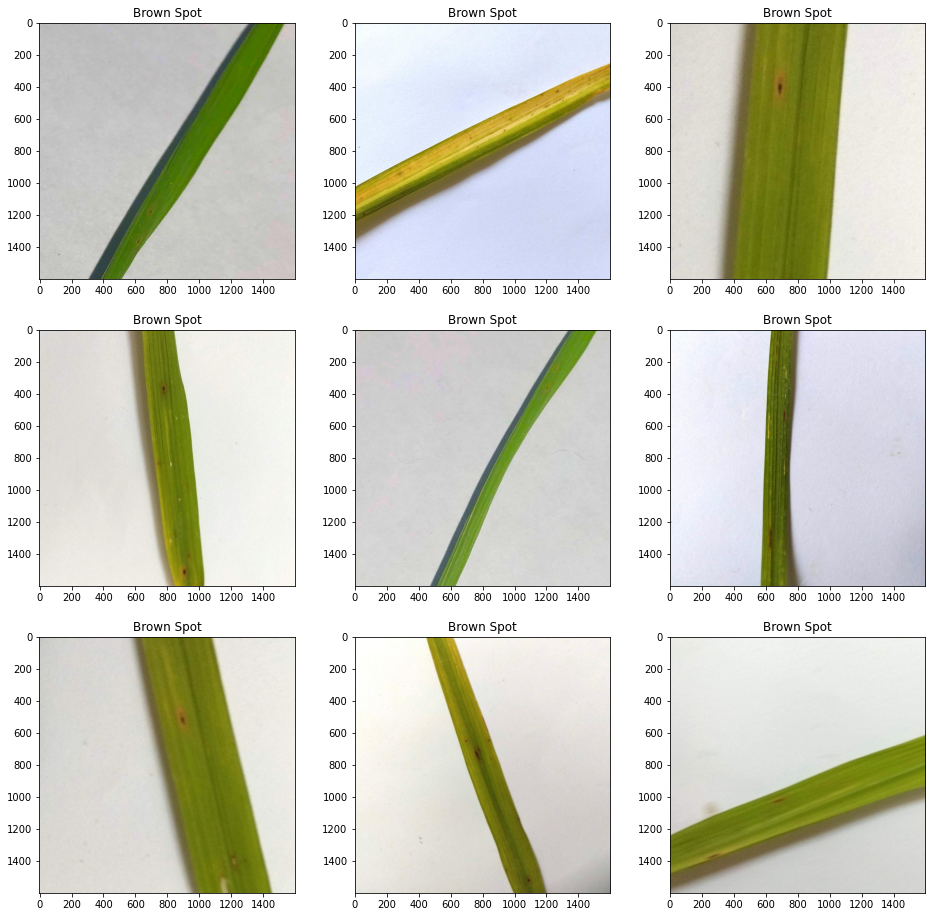

In [ ]:
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(brownspot):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Brown Spot")

# Hispa

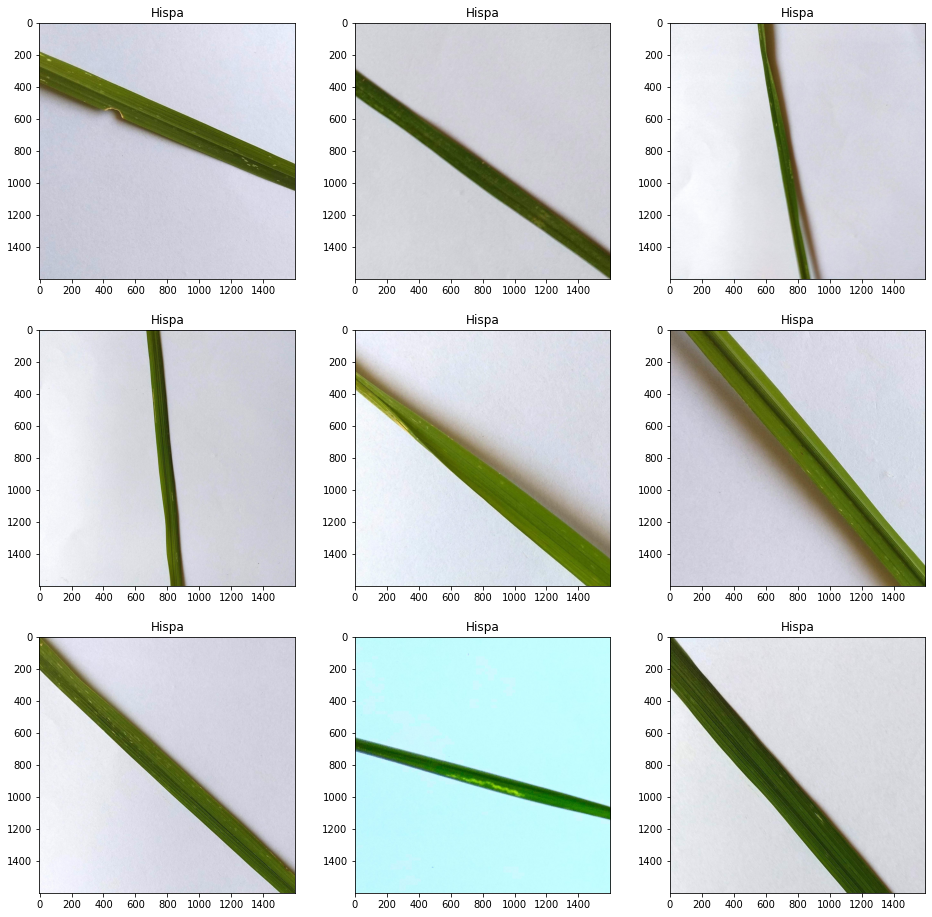

In [ ]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(hispa):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Hispa")

# Blast

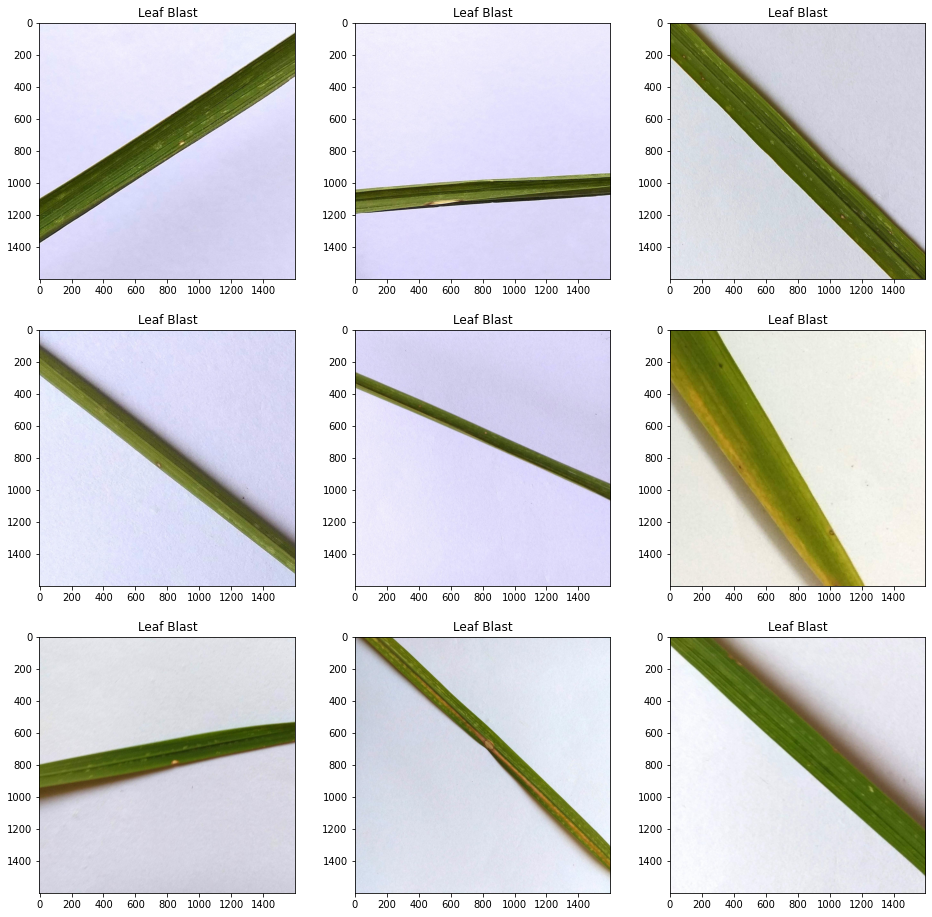

In [ ]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(leafblast):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Leaf Blast")

# Healthy

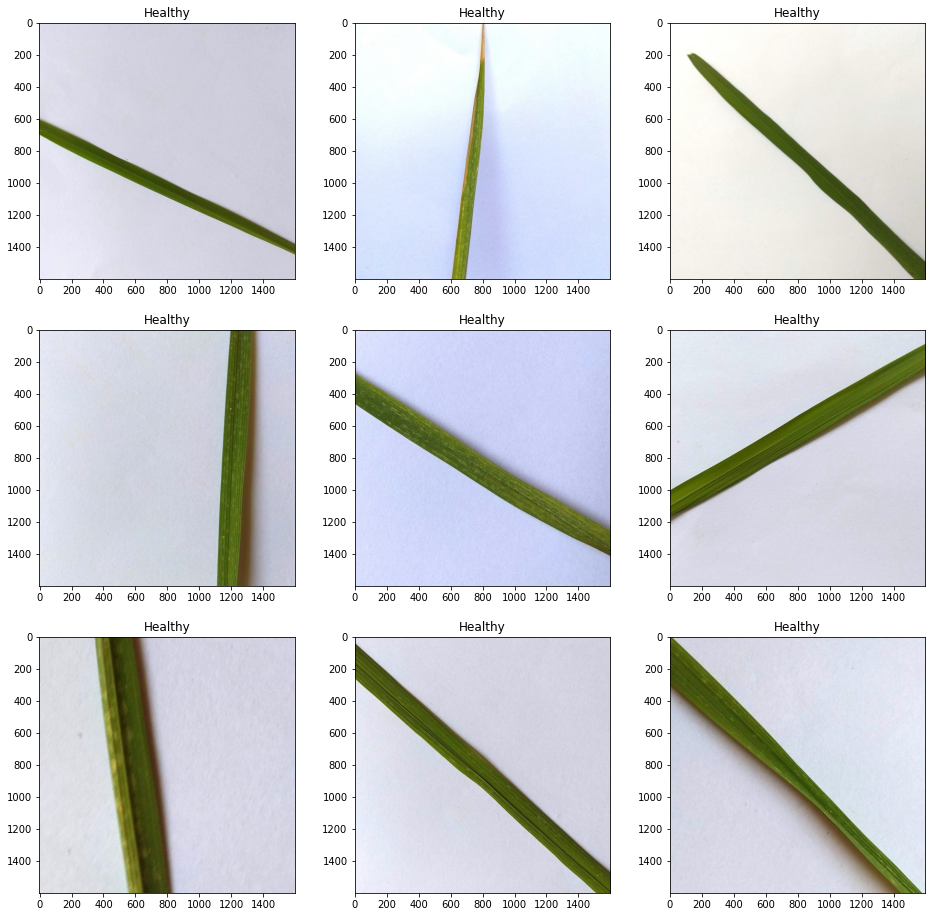

In [ ]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(healthy):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Healthy")

# Membaca Gambar

In [ ]:
dataset=[]
shape=(224,224)
count=0
#FOR EACH OF THE IMAGE
# 1. WE READ THE IMAGE IN RGB FORMAT
# 2. CONVERT IT INTO AN ARRAY 
# 3. SCALE DOWN THE PIXELS
# 4. STORE THE PIXEL INFORMATION
for file in os.listdir(train_dir):
    path=os.path.join(train_dir,file)
    t=0
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=shape)
        image=img_to_array(image)
        image=image/255.0
        dataset+=[[image,count]]
        t+=1
    count=count+1

In [ ]:
#WE DO THE SAME THING FOR THE TEST DATASET
testset=[]
count=0
for file in os.listdir(test_dir):
    path=os.path.join(test_dir,file)
    t=0
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=shape)
        image=img_to_array(image)
        image=image/255.0
        testset+=[[image,count]]
        t+=1
    count=count+1

# Preparing the Data For Out Model


In [ ]:
#WE CREATE THE LABELS AND THE FEATURES FROM THE DATASET FOR BOTH TRAIN AND TEST
data,labels0=zip(*dataset)
test,testlabels0=zip(*testset)

In [ ]:
labels1=to_categorical(labels0)
labels=np.array(labels1)


In [ ]:
data=np.array(data)
test=np.array(test)

In [ ]:
#SPLIT THE DATASET INTO 80-20,TRAIN-VALIDATION RATIO
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=42)

In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(2015, 224, 224, 3)
(504, 224, 224, 3)
(2015, 7)
(504, 7)


In [ ]:
#WE CREATE A BATCH OF IMAGES AFTER AUGMENTING THEM
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=30,
                             zoom_range=0.2,
                             width_shift_range=0.1,
                             height_shift_range=0.2,
                             shear_range=0.2)

# Transfer Learning

In [ ]:
pretrained_model3 = tf.keras.applications.InceptionV3(input_shape=(224,224,3),include_top=False,weights='imagenet')
 

In [ ]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Flatten()(pretrained_model3.output)
x3 = tf.keras.layers.Dense(1024, activation='relu')(x3)
x3 = tf.keras.layers.BatchNormalization()(x3)
x3 = tf.keras.layers.Dropout(0.2)(x3)
outputs3 = tf.keras.layers.Dense(7, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=40)

Epoch 1/40
63/63 [==============================] - 51s 501ms/step - loss: 1.5035 - accuracy: 0.5568 - val_loss: 5.1942 - val_accuracy: 0.3968
Epoch 2/40
63/63 [==============================] - 26s 417ms/step - loss: 0.8307 - accuracy: 0.6725 - val_loss: 1.8055 - val_accuracy: 0.5536
Epoch 3/40
63/63 [==============================] - 27s 420ms/step - loss: 0.6775 - accuracy: 0.7151 - val_loss: 0.8139 - val_accuracy: 0.6865
Epoch 4/40
63/63 [==============================] - 27s 424ms/step - loss: 0.6031 - accuracy: 0.7524 - val_loss: 0.6105 - val_accuracy: 0.7619
Epoch 5/40
63/63 [==============================] - 27s 423ms/step - loss: 0.5537 - accuracy: 0.7672 - val_loss: 0.6050 - val_accuracy: 0.7639
Epoch 6/40
63/63 [==============================] - 27s 432ms/step - loss: 0.5005 - accuracy: 0.7831 - val_loss: 0.5338 - val_accuracy: 0.7659
Epoch 7/40
63/63 [==============================] - 27s 427ms/step - loss: 0.5004 - accuracy: 0.7970 - val_loss: 0.5002 - val_accuracy: 0.8016

# Predictions And Results 

In [ ]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.78      0.61      0.69        77
           2       1.00      1.00      1.00        65
           3       0.73      0.77      0.75        79
           4       1.00      1.00      1.00        70
           5       0.70      0.92      0.80        83
           6       0.70      0.56      0.62        63

    accuracy                           0.84       504
   macro avg       0.84      0.84      0.84       504
weighted avg       0.84      0.84      0.83       504



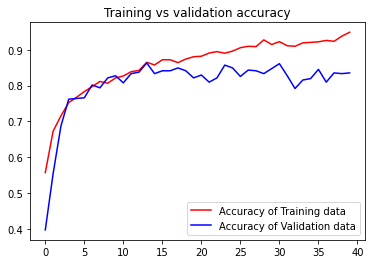

<Figure size 432x288 with 0 Axes>

In [ ]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()


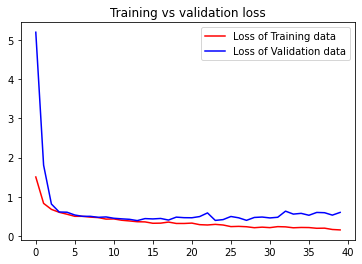

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
# model.save('ResNetForPlant.h5')

In [ ]:
## CODE BLOCK FOR NON-SAFARI BROWSERS
## SAFARI USERS: PLEASE SKIP THIS BLOCK AND RUN THE NEXT ONE INSTEAD

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  print(fn)
  print(classes)

Saving leaf_scald (3).jpg to leaf_scald (3).jpg
leaf_scald (3).jpg
[[0. 0. 0. 0. 1. 0. 0.]]
